Mean=8.160 Stdv=3.870
Mean=5.839 Stdv=5.510
Correlation coeff=0.838
slope=1.19303
C=-3.89578


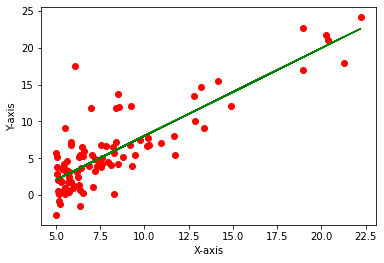

MSE = 8.95394
SSE = 868.532447
SSR = 2046.314605
SST = 2914.847052
R^2 = 0.702032


In [57]:
import numpy as np
from numpy import mean

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import csv
import statistics
from scipy.stats import pearsonr


# X = pd.read_csv("~/1nt18is036/Food-Truck-LineReg.csv")
# print(X)
x = []
y = []

with open('Food-Truck-LineReg.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
      
    for row in plots:
        x.append(row[0])
        y.append((row[1]))

x = list(map(float, x))
y = list(map(float, y))


mean_X = statistics.mean(x)
mean_Y = statistics.mean(y)

std_x = statistics.stdev(x)
std_y = statistics.stdev(y)

print('Mean=%.3f Stdv=%.3f' % (mean_X , std_x))
print('Mean=%.3f Stdv=%.3f' % (mean_Y , std_y))

corr, _ = pearsonr(x, y)
print('Correlation coeff=%.3f' % corr)

m = corr * (std_y/std_x)
print("slope=%.5f" %m)

c = (mean_Y - m*(mean_X))
print("C=%.5f" %c)


y_pred = []
for i in x:
    temp = m*i + c
    y_pred.append(temp)

plt.scatter(x,y,c='red')
plt.plot(x,y_pred,c='green')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

mse = sse/97
print("MSE = %.5f" %mse)

sse=0
for i in range(97):
    temp = pow(y[i]-y_pred[i] , 2)
    sse+=temp
print("SSE = %f" %sse)

ssr = 0 
for i in range(97):
    temp = pow(y_pred[i]-mean_Y , 2)
    ssr+=temp
print("SSR = %f" %ssr)

sst = 0 
for i in range(97):
    temp = pow(y[i]-mean_Y , 2)
    sst+=temp
print("SST = %f" %sst)

r = ssr/sst
print("R^2 = %f" %r)
